In [1]:
#Imports
import os
import pandas as pd
import matplotlib.pyplot as plt

#Set paths
filepath = os.path.join(os.path.dirname(os.getcwd()), "data")
imspath = os.path.join(filepath, "covers")
music = pd.read_excel(os.path.join(filepath, "ratings.xlsx"))
figspath = os.path.join(os.path.dirname(os.getcwd()), "visuals")

In [2]:
### Data cleaning ###

import warnings
warnings.filterwarnings('ignore') #Suppress silly pandas suggestions

#Select only rated albums, and cast rating to categorical
music = music[music['Rating'].notna()]
music['Rating'] = music['Rating'].astype(pd.CategoricalDtype(categories = [1,2,3,4,5], ordered = True))
albums = music[music['Type'] == "Album"]
print(f"Number of albums rated: {len(albums)}")

#Decapitalise genre and turn it into 3 columns (up to 3 genres per album)
albums.loc[:,'Genre'] = albums['Genre'].str.lower()
albums.loc[:,'Genre'] = albums['Genre'].str.split(', ')
albums['Genre'].apply(lambda l: l.extend([None]*(3-len(l))))
albums[['Genre1','Genre2','Genre3']] = pd.DataFrame(albums['Genre'].tolist(), index=albums.index)

#Check if all rated albums have imnames that are in imspath
if len(albums[albums['Img'] != ""]) != len(albums):
    print("Add album covers and file names")
    print(albums[albums['Img'] == ""])
imdif = set(list(albums['Img'])).difference(set(os.listdir(imspath)))
if len(imdif) > 0:
    print("Correct image file names or add album covers to folder")
    print(imdif)

#Save and display the cleaned file
albums.to_csv(os.path.join(filepath, "rated_albums.csv"))
albums.head()

Number of albums rated: 207


,Artist,Title,Type,No. Songs,Bonus?,Genre,Year,Country,Languages,Rating,Fav. Song,Img,Genre1,Genre2,Genre3
0,AC/DC,Back In Black,Album,10.0,NaN,"[rock, hard rock, heavy metal]",1980,USA,English,3,Back In Black,BackInBlack.png,rock,hard rock,heavy metal
1,Alanis Morissette,Jagged Little Pill,Album,12.0,NaN,"[rock, alt rock, None]",1995,Canada,English,4,You Oughta Know,JaggedLittlePill.jpg,rock,alt rock,None
2,Alice in Chains,Facelift,Album,12.0,NaN,"[rock, grunge, heavy metal]",1990,USA,English,4,Man In The Box,Facelift.jpg,rock,grunge,heavy metal
3,Alice In Chains,Dirt,Album,13.0,NaN,"[rock, grunge, hard rock]",1992,USA,English,4,Them Bones,Dirt.jpg,rock,grunge,hard rock
5,All Time Low,So Wrong It's Right,Album,12.0,NaN,"[rock, pop punk, pop rock]",2007,USA,English,3,Dear Maria Count Me In,SoWrongItsRight.jpg,rock,pop punk,pop rock


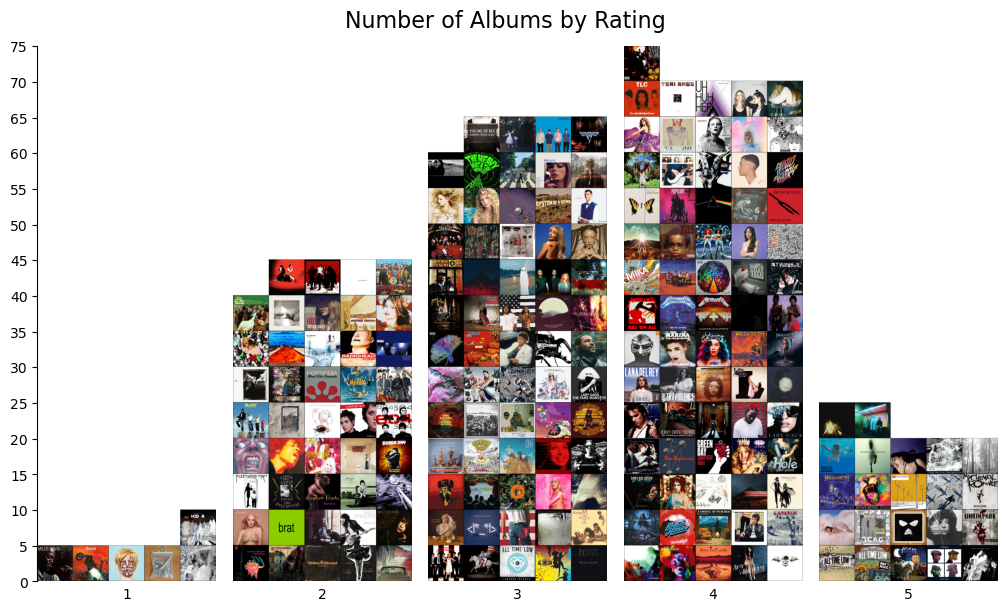

In [5]:
### Create album cover rating bar chart ###

from figures import create_album_bar

filename = "album-bar-chart.png"
genre = None #Whether to limit to a specific genre, else all genres
if genre is not None:
    a = albums[albums[['Genre1','Genre2','Genre3']].isin([genre]).any(axis=1)]
    filename = genre + "_" + filename
else:
    a = albums

#Create, save, and display the figure
fig = create_album_bar(a, imsize = 256, n_wide = 5, imspath = imspath)
fig.savefig(os.path.join(figspath, filename))

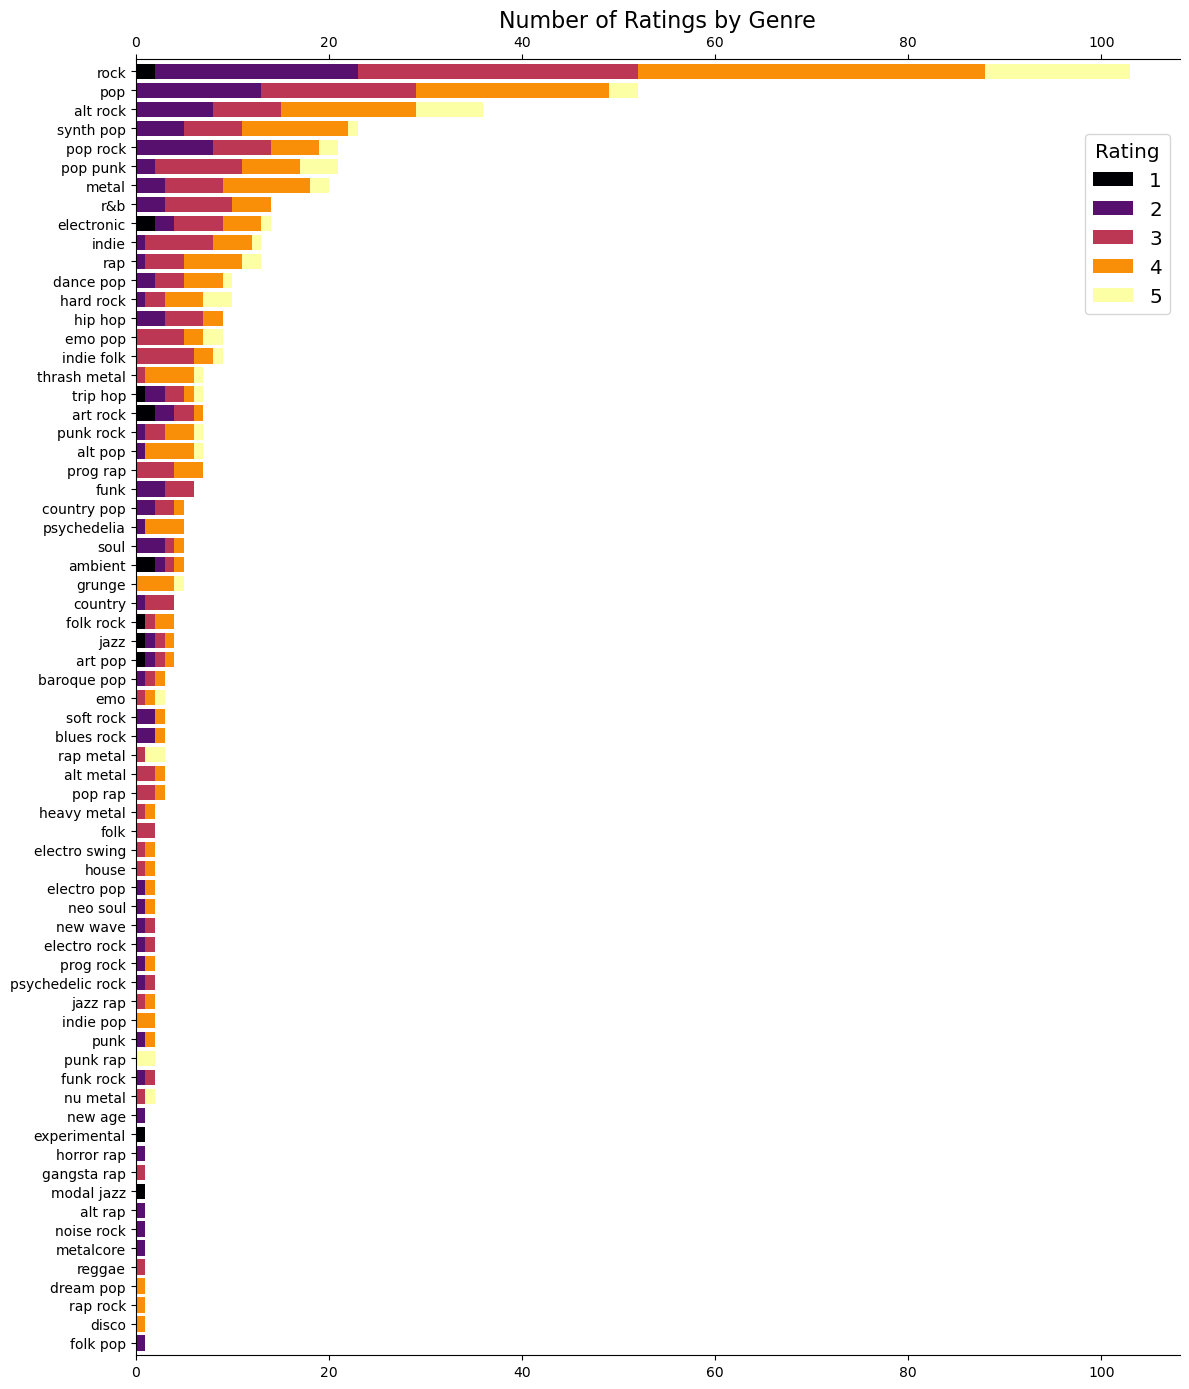

In [6]:
### Create a stacked bar chart of album genres ###

from figures import create_genre_rating_bar

filename = "genre_rating_bar.png"
primary = False #Whether to use only the primary genre, else all three genre lists
if primary: filename = "primary_" + filename

ax = create_genre_rating_bar(albums, primary)
plt.savefig(os.path.join(figspath, filename))

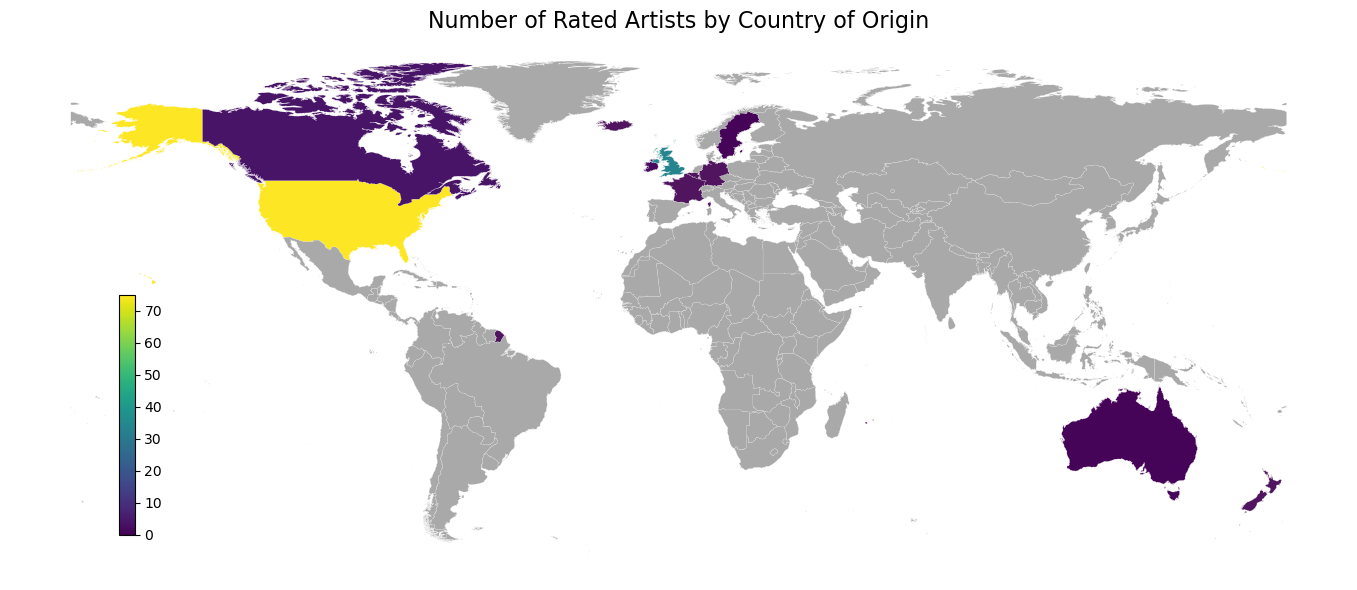

In [3]:
### Create world headmap of artist origin ###

from figures import create_artist_origin_map

filename = "origin_country_map.png"
darkmode = False

fig = create_artist_origin_map(albums, filepath, darkmode)
plt.savefig(os.path.join(figspath, filename))